In [1]:
# importing the necessary dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Akash\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Akash\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Akash\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
train_df = pd.read_csv('D:/AIMT\Sem 2/AML 2404/Dataset/sign_mnist_train/sign_mnist_train.csv')
test_df = pd.read_csv('D:/AIMT/Sem 2/AML 2404/Dataset/sign_mnist_test/sign_mnist_test.csv')

In [3]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
train_df.shape, test_df.shape

((27455, 785), (7172, 785))

In [5]:
labels = train_df['label'].values

In [6]:
print("Missing values:\n", train_df.isnull().sum())

# Check for duplicates
print("Duplicate rows:", train_df.duplicated().sum())

Missing values:
 label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64
Duplicate rows: 0


In [7]:
def show_images(images,labels):
    images = images.values.reshape(-1,28,28,1)
    unique_labels = labels.unique()
    fig,ax = plt.subplots(2,5)
    fig.set_size_inches(10, 5)
    k =0
    for i in range(2):
        for j in range(5):
            ax[i,j].imshow(images[k],cmap='gray')
            ax[i,j].set_title(str(unique_labels[labels[k]]))
            k = k+1;
#     plt.axis('off')
    plt.tight_layout()
    

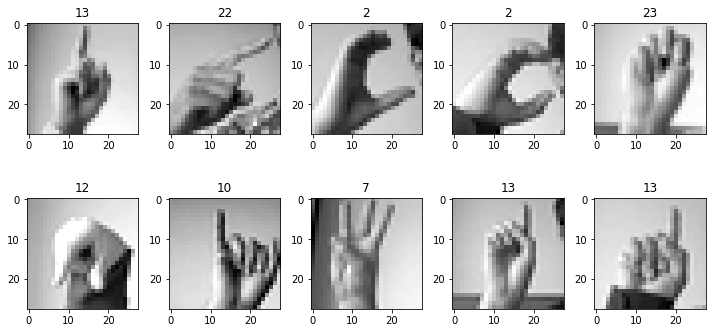

In [8]:
show_images(train_df.drop(columns='label'), train_df['label'])

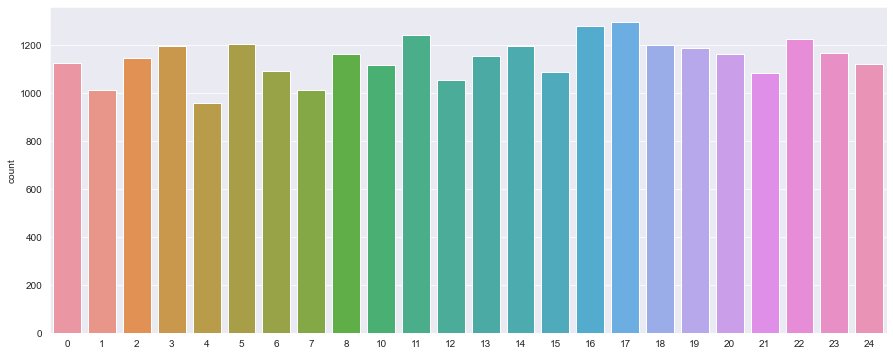

In [9]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x=labels)
plt.show()

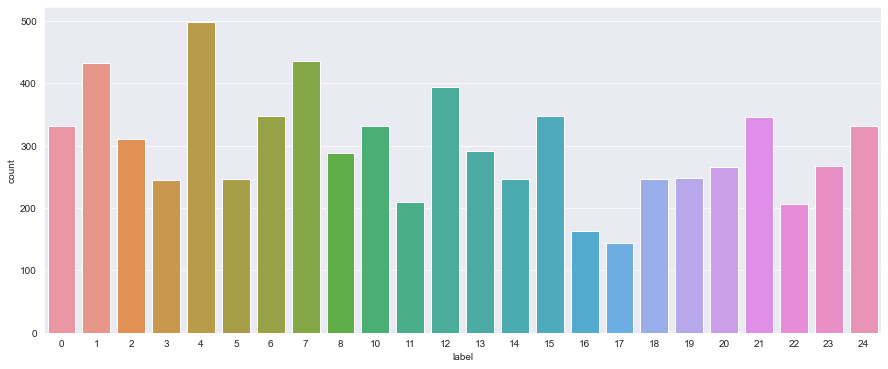

In [10]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x=test_df['label'])
plt.show()

In [11]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

In [12]:
train_df.drop('label',axis=1,inplace=True)

In [13]:
images =  train_df.values
images = np.array([np.reshape(i,(28,28)) for i in images])
images = np.array([i.flatten() for i in images])

In [14]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)

In [15]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [16]:
plt.rcParams["axes.grid"] = False

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


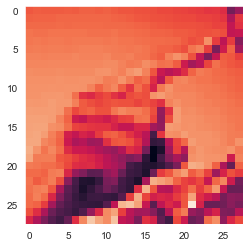

In [17]:
index = 1
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [18]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [19]:
# Use openCV to view 10 random images from our training data

import cv2
for i in range(0,10):
    rand = np.random.randint(0,len(images))
    input_im =  images[rand]
    
    sample = input_im.reshape(28,28).astype(np.uint8)
    sample = cv2.resize(sample, None, fx=10, fy=10, interpolation = cv2.INTER_CUBIC)
    cv2.imshow("Sample Image",sample)
    cv2.waitKey()
    
cv2.destroyAllWindows()

In [20]:
#split data into X_train, X_test, y_train and y_test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images,labels,test_size=0.3, random_state=101)

In [21]:
# Start Loading our tensorflow modules and define our batch size etc

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [22]:
batch_size =128
num_classes = 24
epochs = 10

In [23]:
#Scale our images
X_train = X_train/255
X_test = X_test/255

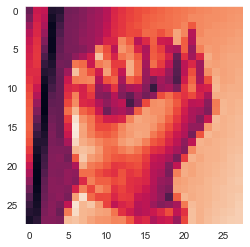

In [24]:
#Reshape them into the size required by TF and Keras
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)

plt.imshow(X_train[0].reshape(28,28))

In [25]:
# Create our CNN Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28, 28,1))) 
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu')) 
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense (128, activation = 'relu'))
model.add(Dropout (0.20))

model.add(Dense (num_classes, activation = 'softmax'))

In [26]:
#Compile Model
model.compile(loss = 'categorical_crossentropy',
             optimizer = Adam(), metrics= ['accuracy'])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [28]:
#Train model

history = model.fit(X_train, y_train, validation_data= (X_test,y_test), epochs=epochs, batch_size = batch_size)

Epoch 1/10
151/151 [==============================] - 19s 116ms/step - loss: 2.6431 - accuracy: 0.1929 - val_loss: 1.6276 - val_accuracy: 0.4667
Epoch 2/10
151/151 [==============================] - 17s 113ms/step - loss: 1.2417 - accuracy: 0.5804 - val_loss: 0.7962 - val_accuracy: 0.7417
Epoch 3/10
151/151 [==============================] - 16s 103ms/step - loss: 0.7213 - accuracy: 0.7534 - val_loss: 0.4698 - val_accuracy: 0.8478
Epoch 4/10
151/151 [==============================] - 14s 93ms/step - loss: 0.4560 - accuracy: 0.8464 - val_loss: 0.3018 - val_accuracy: 0.9075
Epoch 5/10
151/151 [==============================] - 14s 92ms/step - loss: 0.3079 - accuracy: 0.8986 - val_loss: 0.1745 - val_accuracy: 0.9529
Epoch 6/10
151/151 [==============================] - 14s 92ms/step - loss: 0.2073 - accuracy: 0.9345 - val_loss: 0.1169 - val_accuracy: 0.9729
Epoch 7/10
151/151 [==============================] - 14s 90ms/step - loss: 0.1380 - accuracy: 0.9587 - val_loss: 0.0786 - val_accura

In [29]:
model.save("sign_mnist_cnn_10_epochs.h5")
print("Model Saved")

Model Saved


C:\Users\Akash\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


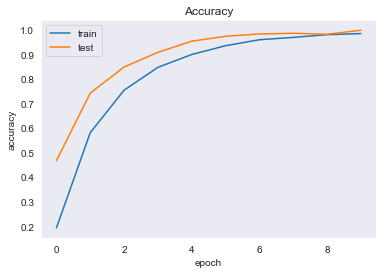

In [30]:
# View our training history graphically 

plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])
plt.show()

In [31]:
# Reshape our test data so that we can evaluate it's performance on unseen data 
test_labels = test_df['label']
test_df.drop('label', axis= 1, inplace=True)
test_images = test_df.values
test_images = np.array([np.reshape(i, (28,28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])

test_labels = label_binarizer.fit_transform(test_labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape
y_pred = model.predict(test_images)

225/225 [==============================] - 2s 8ms/step


In [32]:
# Get our accuracy score I
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.7757947573898494

In [1]:
# Create function to match label to letter 
def getLetter(result):
    classLabels = { 0: 'A',
                    1: 'B',
                    2: 'C',
                    3: 'D',
                    4: 'E',
                    5: 'F',
                    6: 'G',
                    7: 'H',
                    8: 'I',
                    9: 'K',
                    10: 'L',
                    11: 'M',
                    12: 'N',
                    13: '0',
                    14: 'P',
                    15: 'Q',
                    16: 'R',
                    17: 'S',
                    18: 'T',
                    19: 'U',
                    20: 'V',
                    21: 'W',
                    22: 'X',
                    23: 'Y'}
    try:
        res =  int(result)
        return classLabels[res]
    except:
        return "Error"

## Test on Actual Webcam Input

In [2]:
import tensorflow as tf
model = tf.keras.models.load_model('sign_mnist_cnn_10_epochs.h5')

C:\Users\Akash\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Akash\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Akash\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [ ]:
import cv2
import numpy as np
cap= cv2.VideoCapture (0)
while True:
    ret, frame = cap.read()
    ##############################
    frame=cv2.flip(frame, 1)
    #define region of interest 
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    cv2.imshow('roi sacled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    roi = roi.reshape(1,28,28,1)
    result = model.predict(roi)
    predicted_class = np.argmax(result)
#     result = str(model.predict_classes(roi, 1, verbose = 0)[0])
#     cv2.putText(copy, getLetter (result), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2) 
    cv2.putText(copy, getLetter(predicted_class), (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)

    cv2.imshow('frame', copy)
    
    if cv2.waitKey(1) == 13:
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 29ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 22ms/step


1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 20ms/step


1/1 [==============================] - 0s 21ms/step


1/1 [==============================] - 0s 28ms/step


Performance is very low. Not able to any alphabet.
So now going to use large dataset which have more alphabet images.